<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Tutorial-27:-Melting-Point-by-Free-Energy" data-toc-modified-id="Tutorial-27:-Melting-Point-by-Free-Energy-27"><span class="toc-item-num">27&nbsp;&nbsp;</span>Tutorial 27: Melting Point by Free Energy</a></span><ul class="toc-item"><li><span><a href="#Initialization" data-toc-modified-id="Initialization-27.1"><span class="toc-item-num">27.1&nbsp;&nbsp;</span>Initialization</a></span></li><li><span><a href="#Run-free-energy-calculations" data-toc-modified-id="Run-free-energy-calculations-27.2"><span class="toc-item-num">27.2&nbsp;&nbsp;</span>Run free energy calculations</a></span></li><li><span><a href="#Analyze-data" data-toc-modified-id="Analyze-data-27.3"><span class="toc-item-num">27.3&nbsp;&nbsp;</span>Analyze data</a></span></li><li><span><a href="#Melting-point-of-other-elements" data-toc-modified-id="Melting-point-of-other-elements-27.4"><span class="toc-item-num">27.4&nbsp;&nbsp;</span>Melting point of other elements</a></span><ul class="toc-item"><li><span><a href="#MEAM-Si" data-toc-modified-id="MEAM-Si-27.4.1"><span class="toc-item-num">27.4.1&nbsp;&nbsp;</span>MEAM Si</a></span></li><li><span><a href="#MEAM-Au" data-toc-modified-id="MEAM-Au-27.4.2"><span class="toc-item-num">27.4.2&nbsp;&nbsp;</span>MEAM Au</a></span></li><li><span><a href="#EAM-Au" data-toc-modified-id="EAM-Au-27.4.3"><span class="toc-item-num">27.4.3&nbsp;&nbsp;</span>EAM Au</a></span></li><li><span><a href="#MEAM-Ge" data-toc-modified-id="MEAM-Ge-27.4.4"><span class="toc-item-num">27.4.4&nbsp;&nbsp;</span>MEAM Ge</a></span></li><li><span><a href="#SW-Ge" data-toc-modified-id="SW-Ge-27.4.5"><span class="toc-item-num">27.4.5&nbsp;&nbsp;</span>SW Ge</a></span></li></ul></li></ul></li></ul></div>

## Tutorial 27: Melting Point by Free Energy
Yikai Yin, Seunghwa Ryu and Wei Cai

**2019-07-29**

This tutorial describes how to compute melting points from free energy methods.  We provide the MD++ script files and describe how to use them in detail.  The theoretical background is published in 

Comparison of Thermal Properties Predicted by Interatomic Potential Models,  Modelling and Simulation in Materials Science and Engineering, 16, 085005 (2008). [(PDF)](http://micro.stanford.edu/~caiwei/papers/Ryu08msmse-meltingT.pdf) (Paper selected as [MSMSE featured article](http://www.iop.org/EJ/journal/-page=featured/0965-0393).)

Adapted from the [wiki page](http://micro.stanford.edu/wiki/Computing_Melting_Point_by_Free_Energy_Method)

This notebook is configured to run on the parallel cluster mc2.stanford.edu.

### Initialization

**1. This notebook uses the following extensions, please set them up in nbextensions before using this notebook**
* Table of Content (2)

<sub>Instructions for nbextension installation is in [Tutorial 01 1.2.2.2](Tutorial%2001%20-%20Introduction%20to%20MD%2B%2B.ipynb)</sub>

**2. If you have not, please add the following 3 lines into `~/.bashrc`, and reboot Ubuntu to setup the environment variables**

These environmental variables specifies the MD++ root directory, the MD++ compiling system, and name of the MD++ executable, respectively.

**3. Check if environmental variables are set. Change current working directory into the MD++ root folder**

In [1]:
import os

envvar_test = True
envvars = ['MDPLUS_DIR', 'MDPLUS_EXE', 'MDPLUS_SYS']
for envvar in envvars:
    if envvar not in os.environ.keys():
        print('Environment variable "'+envvar+'" not set')
        envvar_test = False
    else:
        print('Environment variable "'+envvar+'" set to '+os.environ[envvar])

if not envvar_test:
    raise OSError

mdpp_dir = os.environ['MDPLUS_DIR']
os.chdir(mdpp_dir)

Environment variable "MDPLUS_DIR" set to /Users/caiwei/Codes/MD++.git
Environment variable "MDPLUS_EXE" set to bin/mdpp.so
Environment variable "MDPLUS_SYS" set to mac


### Run free energy calculations

The script for free energy calculations can be run with different interatomic potentials implemented in MD++, e.g.

<pre>
sw                  - Stillinger-Weber Silicon (modified by Balamane et al.)
sworig              - Original version of SW Silicon
swge                - Stillinger-Weber Germanium
tersoff             - Tersoff potential for Silicon
meam-lammps         - MEAM (taken from lammps)
meam-baskes         - MEAM (taken from Baskes's code dynamo)
meam                - MEAM (directly implemented in MD++)
eam                 - Embedded Atom Method 
fs                  - Finnis-Sinclair
</pre> 

In this test case, we will compute the melting point of Si using the original Stillinger Weber (sworig) potential.

**Compile the sworig executable**

In [ ]:
%%sh
cd $MDPLUS_DIR
make clean; make sworig SYS=$MDPLUS_SYS build=R PY=yes

**Run the simulations**

We can run the simulations interactively using the following commands.  There are many steps for the calculation, as indicated by the first command line argument (status) following the [melting_cubic.mdpp.py](http://localhost:8888/edit/scripts/ME346B/melting_cubic.mdpp.py).py file.  The second argument (idx) is the job index (some job status can be run repeatedly to gather more statistics).  The third argument (material) specifies the potential model.  The fourth argument (graphic) specifies whether we want to open an X-window or not.

In the following example, status = 1, idx = 1, material = SW_Si, graphic = On.

Notice that the job status = 1 can be run only once.  MD++ will quit if it detects that it has been run before by checking the ``flag`` file in the runs/Single_Elem_Tm/SW_Si_Solid directory.

In [ ]:
%%sh
cd $MDPLUS_DIR
$MDPLUS_EXE scripts/ME346B/melting_cubic.mdpp.py  1 1 SW_Si On

The following are the commands needed to run all the steps of the melting point calculation by free energy methods.  The fourth argument has been omitted, so the X-window will be turned off (by default).  Notice that it may take more than 6 hours to finish all the steps.

In [ ]:
%%sh
cd $MDPLUS_DIR
for i in 1 2 3 4 5 6 7 8 9 10 11 12 13
do
    echo '$MDPLUS_EXE' scripts/ME346B/melting_cubic.mdpp.py  $i 1 SW_Si 
    # uncomment the following lines to run the simulation
    #$MDPLUS_EXE scripts/ME346B/melting_cubic.mdpp.py  $i 1 SW_Si 
done

If you have access to a cluster, you can also subject all the calculations as one job.  The following are the commands to submit the job file [melt.sbatch](http://localhost:8888/edit/scripts/ME346B/melt.sbatch) on the cluster mc2.stanford.edu.  Note the & symbol at the end of the MD++ command line (in the for loop).  This means all the calculations are submitted to the cluster to run in parallel.  There are some interdependencies between the calculations, which are automatically handled by the script file through the use of the ``flag`` file.  The wait command at the end of the file waits for all the calculations to finish before exiting this job.

**Submit job to mc2**

In [ ]:
%%sh
cd $MDPLUS_DIR
#make clean; make sworig SYS=$MDPLUS_SYS build=R PY=yes
#sbatch scripts/ME346B/melt.sbatch

**Check job status**

In [ ]:
%%sh
squeue | grep melt

**Simulation data files**

After the calculation is finished (within 24 hours), the free energy data will be stored in the following two directories.

<pre>
${MDPLUS_DIR}/runs/Single_Elem_Tm/SW_Si_Solid/
${MDPLUS_DIR}/runs/Single_Elem_Tm/SW_Si_Liquid/
</pre>

### Analyze data

We will first examine the data from the first simulation step (status = 1), which equilibrates the crystal at a finite temperature.

In [2]:
%matplotlib notebook
# define plotting functions
def plot_T_p_V(Tinst, pressure, V, Tavg, pavg, Vavg):
    fig0, axes = plt.subplots(2, 2, figsize=(9.5, 8))
    axes[0][0].plot(curstep, Tinst, '-', [curstep[0],curstep[-1]], [Tavg, Tavg], '--')
    #axes[0][0].set_xlabel(r'Number of steps x 1000', **font)
    axes[0][0].set_ylabel(r'T (K)', **font)
    axes[0][0].set_title(r'Instantaneous temperature')
    axes[0][0].ticklabel_format(axis='x', style='sci', scilimits=(0,4)) 

    axes[0][1].plot(curstep, pressure, '-', [curstep[0],curstep[-1]], [pavg, pavg], '--')
    #axes[0][1].set_xlabel(r'Number of steps', **font)
    axes[0][1].set_ylabel(r'p (MPa)', **font)
    axes[0][1].set_title(r'Pressure')
    axes[0][1].ticklabel_format(axis='x', style='sci', scilimits=(0,4)) 
    
    axes[1][0].plot(curstep, V, '-', [curstep[0],curstep[-1]], [Vavg, Vavg], '--')
    axes[1][0].set_xlabel(r'Number of steps', **font)
    axes[1][0].set_ylabel(r'V ($\AA^3$)', **font)
    axes[1][0].set_title(r'Volume')
    axes[1][0].ticklabel_format(axis='x', style='sci', scilimits=(0,4)) 
    
    axes[1][1].plot(curstep, (V/V[0])**(1.0/3)-1, '-', [curstep[0],curstep[-1]], np.array([1,1])*((Vavg/V[0])**(1.0/3)-1), '--')
    axes[1][1].set_xlabel(r'Number of steps', **font)
    axes[1][1].set_ylabel(r'$\epsilon^T$', **font)
    axes[1][1].set_title(r'thermal strain')
    axes[1][1].ticklabel_format(axis='x', style='sci', scilimits=(0,4)) 

<IPython.core.display.Javascript object>


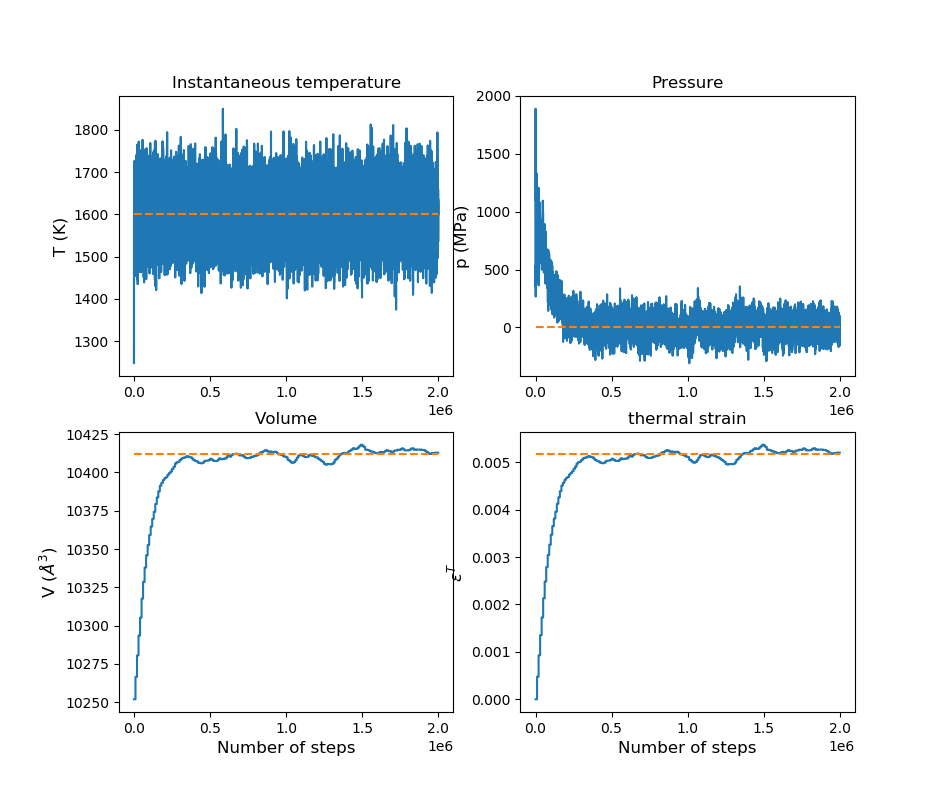

T_avg = 1599.794973 K
p_avg = 3.715660 MPa
V_avg = 10412.150934 MPa
averaged thermal strain = 0.00518122


In [3]:
#Python script to plot the property data saved by MD run

import numpy as np
import matplotlib.pyplot as plt
import pickle

runsdir = os.path.join(mdpp_dir, 'runs/Single_Elem_Tm')
material = 'SW_Si'

picklefile = os.path.join(runsdir, '%s_Solid/datastore.pickle'%(material))
with open(picklefile, 'rb') as f:
    datastore, material = pickle.load(f) 

T_solid_0        = datastore[material]["T_solid_0"]
T_liquid_0       = datastore[material]["T_liquid_0"]
atom_mass        = datastore[material]["atom_mass"]
factor_solid_RS  = datastore[material]["factor_solid_RS"]
factor_liquid_RS = datastore[material]["factor_liquid_RS"]
    
propfile = os.path.join(runsdir, '%s_Solid/prop_F1_1.out'%(material))
#propfile = os.path.join(runsdir, '%s_Liquid/prop_F7_1.out'%(material))

data = np.loadtxt(propfile)
curstep = data[:,0]
Tinst   = data[:,4]
V       = data[:,11]
pressure= np.mean(data[:,5:8], axis=1)*160.2e3

Tavg = np.mean(Tinst[len(Tinst)//2:])
pavg = np.mean(pressure[len(pressure)//2:])
Vavg = np.mean(V[len(V)//2:])

font = {'size' : 12}
plot_T_p_V(Tinst, pressure, V, Tavg, pavg, Vavg)
plt.show()

# Print average temperature and pressure in the second half of the simulation
print("T_avg = %f K"%(Tavg))
print("p_avg = %f MPa"%(pavg))
print("V_avg = %f MPa"%(Vavg))
print("averaged thermal strain = %g"%((Vavg/V[0])**(1.0/3)-1))

We need to confirm that the simulation is <u>long enough</u> so that the average box size in the second half of the simulation is an accurate estimate of the thermal strain of the solid at this temperature.  All the free energy calculations for the solid (status = 2, 3, 4, 5, 6) are based on this thermal strain value.

**Compute solid free energy from harmonic approximation**

(adapted from status == 14 section of [melting_cubic.mdpp.py](http://localhost:8888/edit/scripts/ME346B/melting_cubic.mdpp.py).py)

In [4]:
import numpy as np

# You can change the runsdir here to analyze data from a different simulation
#   But if the data were produced by old tcl script, you may need to copy data files
#   MEAM_F#.dat to work_F#.dat and MEAM_F#.out to prop_F#.out
#runsdir = os.path.join(mdpp_dir, 'runs/Single_Elem_Tm_sav1')

hessianfile = os.path.join(runsdir, '%s_Solid/hessian%g.out'%(material,T_solid_0))
info_solid  = os.path.join(runsdir, '%s_Solid/info2.dat'%(material))
temp        = np.loadtxt(info_solid)
Vol         = temp[4]
EPOT        = temp[3]
NP          = temp[6].astype(int)

# Universal constants 
kB   = datastore["constants"]["kB"]
hbar = datastore["constants"]["hbar"]
Na   = datastore["constants"]["Na"]

data = np.loadtxt(hessianfile)
data2= np.reshape(-data,(NP*3,NP*3))
data2= (data2+np.transpose(data2))/2
D1, V= np.linalg.eig(data2)
D1   = np.sort(D1)
w    = np.sqrt(D1[3:]*16.022*Na/(atom_mass*0.001))
F1   = -kB*T_solid_0*np.sum(np.log(np.divide(kB*T_solid_0/hbar, w))).real

F = F1
F_per = F / NP
Fha = F + EPOT*NP
print('Quasi-harmonic approximation:')
print('F = {:.6f} (eV) dFhar = {:.6f} (eV) F_per = {:.6f} (eV)'.format(F+EPOT*NP,F,F_per))

Quasi-harmonic approximation:
F = -2472.864983 (eV) dFhar = -253.344983 (eV) F_per = -0.494814 (eV)


**Compute free energies of solid phase**

In [5]:
# load the work done during switching simulations
data3  = np.loadtxt(os.path.join(runsdir, '%s_Solid/work_F3.dat'  %(material)))
data4  = np.loadtxt(os.path.join(runsdir, '%s_Solid/work_F4.dat'  %(material)))
data5  = np.loadtxt(os.path.join(runsdir, '%s_Solid/prop_F5.out'  %(material)))
data6  = np.loadtxt(os.path.join(runsdir, '%s_Solid/prop_F6.out'  %(material)))

free3       = np.mean(data3[:,1])
free3_e     = np.std (data3[:,1])
free4       = np.mean(data4[:,1])
free4_e     = np.std (data4[:,1])
dFre_Fha    = (free4-free3)/2.0
dFre_Fha_e  = (free3_e+free4_e)/2.0
Fre_T1      = Fha + dFre_Fha

print('Free energy of real solid at T_solid_0:')
print('Fre_T1 = %20.12e'%(Fre_T1))

# solid free energy
d = factor_solid_RS - 1.0
lam = np.arange(1,factor_solid_RS+d/100000,d/10000)
iter = np.floor(data5.shape[0]/10001).astype(int)
temp1 = data5[:10001*iter,7].reshape((10001,iter), order='F')
iter = np.floor(data6.shape[0]/10001).astype(int)
temp2 = data6[:10001*iter,7].reshape((10001,iter), order='F')
w1 = np.mean(temp1, axis=1)
w2 = np.mean(temp2, axis=1)

w1_inv = w2[-1] - np.flip(w2)
w = (w1 - w1_inv) / 2.0
T_solid = T_solid_0 / lam
Fs = np.multiply((Fre_T1 + w)/T_solid_0 - 3.0/2*(NP-1)*kB*np.log(T_solid/T_solid_0), T_solid)
print('Free energy of solid as a function of temperature:')
print('Fs = [%20.12e, %20.12e, ..., %20.12e, %20.12e]'%(Fs[0],Fs[1],Fs[-2],Fs[-1]))

Free energy of real solid at T_solid_0:
Fre_T1 =  -2.478650108847e+03
Free energy of solid as a function of temperature:
Fs = [ -2.478650108847e+03,  -2.478659712560e+03, ...,  -2.605409216229e+03,  -2.605425806902e+03]


###### **Compute free energies of liquid phase**

In [6]:
# load the work done during switching simulations
data8  = np.loadtxt(os.path.join(runsdir, '%s_Liquid/work_F8.dat' %(material)))
data9  = np.loadtxt(os.path.join(runsdir, '%s_Liquid/work_F9.dat' %(material)))
data10 = np.loadtxt(os.path.join(runsdir, '%s_Liquid/work_F10.dat'%(material)))
data11 = np.loadtxt(os.path.join(runsdir, '%s_Liquid/work_F11.dat'%(material)))
data12 = np.loadtxt(os.path.join(runsdir, '%s_Liquid/prop_F12.out'%(material)))
data13 = np.loadtxt(os.path.join(runsdir, '%s_Liquid/prop_F13.out'%(material)))

info_liquid = os.path.join(runsdir, '%s_Liquid/info2.dat'%(material))
temp        = np.loadtxt(info_liquid)
Vliq        = temp[4]
NP          = temp[6].astype(int)
Tliq        = T_liquid_0

# liquid free energy
logfactorial = lambda x: (x+0.5)*np.log(x)-x+0.5*np.log(2*np.pi)
logfac = logfactorial(NP-1)
gam = np.sqrt(6.626068**2 * 6.022 / (1.3806503*atom_mass*0.001*Tliq*2*np.pi)) * 0.1
Fid = -kB*Tliq*((NP-1)*np.log(Vliq/gam**3)-logfac)

free8       = np.mean(data8[:,1])
free8_e     = np.std (data8[:,1])
free9       = np.mean(data9[:,1])
free9_e     = np.std (data9[:,1])
dFsw_Fga    = (free9-free8)/2.0
dFsw_Fga_e  = (free9_e+free8_e)/2.0
free10      = np.mean(np.sum(data10[:,1:7],axis=1))
free11      = np.mean(np.sum(data11[:,1:7],axis=1))
dFga_Fid    = (free11-free10)/2.0
Fsw_T2      = Fid+dFga_Fid+dFsw_Fga

print('Free energy of real liquid at T_liquid_0:')
print('Fsw_T2 = %20.12e'%(Fsw_T2))

d = factor_liquid_RS - 1.0
lam2 = np.arange(1,factor_liquid_RS+d/100000,d/10000)
iter = np.floor(data12.shape[0]/10001).astype(int)
temp3 = data12[:10001*iter,7].reshape((10001,iter), order='F')
iter = np.floor(data13.shape[0]/10001).astype(int)
temp4 = data13[:10001*iter,7].reshape((10001,iter), order='F')
w3 = np.mean(temp3, axis=1)
w4 = np.mean(temp4, axis=1)

w3_inv = w4[-1] - np.flip(w4)
ww = (w3 - w3_inv) / 2.0
T_liquid = T_liquid_0 / lam2
Fl = np.multiply((Fsw_T2 + ww)/T_liquid_0 - 3.0/2*(NP-1)*kB*np.log(T_liquid/T_liquid_0), T_liquid)
print('Free energy of liquid as a function of temperature:')
print('Fl = [%20.12e, %20.12e, ..., %20.12e, %20.12e]'%(Fl[0],Fl[1],Fl[-2],Fl[-1]))

Free energy of real liquid at T_liquid_0:
Fsw_T2 =  -2.636106623657e+03
Free energy of liquid as a function of temperature:
Fl = [ -2.636106623657e+03,  -2.636085017286e+03, ...,  -2.469666941970e+03,  -2.469654134468e+03]


**Plot free energies of the solid and liquid phases and determine the melting point**

T_m = 1691.83 K


<IPython.core.display.Javascript object>


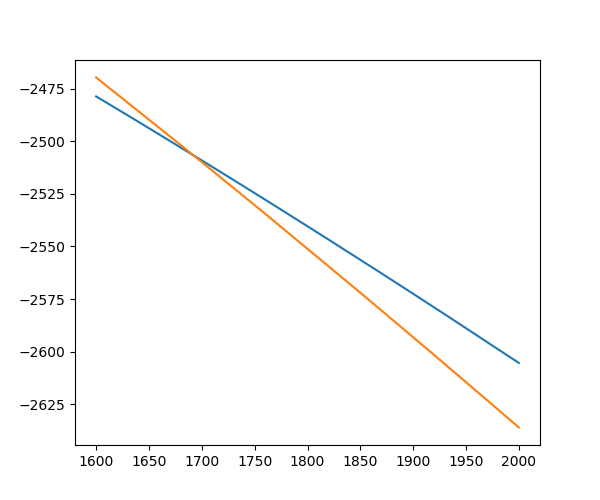

In [7]:
# interpolate solid and liquid free energy
Tmin = max(T_solid[0], T_liquid[-1])
Tmax = min(T_solid[-1], T_liquid[0])
dT = (Tmax-Tmin) / 100000
T_grid = np.arange(Tmin,Tmax+dT/10,dT)
Fs_interp = np.interp(T_grid, T_solid,  Fs)
Fl_interp = np.interp(T_grid, np.flip(T_liquid), np.flip(Fl))

ind_min = np.argmin(np.abs(Fs_interp - Fl_interp))
T_m = T_grid[ind_min]
print('T_m = %g K'%(T_m))

fig1, ax1 = plt.subplots(1, 1, figsize=(6, 5))
ax1.plot(T_grid, Fs_interp, T_grid, Fl_interp)
plt.show()

Alternatively, we can also perform the data analysis described above by running the python script with status = 14, after all the steps (status = 1, 2, ..., 13) have finished.  (Running the job in a shell command line, instead of within the jupyter notebook, opens a plot window.)

**To do: print out the info and error analysis**

In [ ]:
%%sh
cd $MDPLUS_DIR
$MDPLUS_EXE scripts/ME346B/melting_cubic.mdpp.py  14 1 SW_Si 

You'll see the following output files that contain all free energy data and the error analysis.

<pre>
Solid Free Energy Info

lattice const =    5.43095
strain =    0.00518
E_0 = -2218.74337 eV (   -4.33348 eV/atom)
F_w = -253.34582 eV (   -0.49482 eV/atom)
F_ha = E_0 + F_w = -2472.08919 eV (   -4.82830 eV/atom)
W_re_to_ha =    5.99169 eV (    0.01170 eV/atom)
W_ha_to_re =   -7.30068 eV (   -0.01426 eV/atom)
F_re - F_ha = (W_ha_to_re - W_re_to_ha)/2 =   -6.64619 eV (   -0.01298 eV/atom)
F_re at 1600.000000 = -2478.73538 eV (   -4.84128 eV/atom)
W_T1_to_T11 =  417.87095 eV (    0.81615 eV/atom)
W_T11_to_T1 = -417.87508 eV (   -0.81616 eV/atom)
dW1 = (W_T1_to_T11 - W_T11_to_T1)/2 =  417.87302 eV (    0.81616 eV/atom)
F_re at 2000.000000 = -2605.55266 eV (   -5.08897 eV/atom)
</pre>

<pre>
Liquid Free Energy Info

strain =   -0.01894
F_ideal = -919.36940 (   -1.79564 eV/atom)
W_re_to_ga = 1888.21102 eV (    3.68791 eV/atom)
W_ga_to_re = -1887.53306 eV (   -3.68659 eV/atom)
F_re - F_ga = (W_ga_to_re - W_re_to_ga)/2 = -1887.87204 eV (   -3.68725 eV/atom)
W_ga_to_id = -256.29295 eV (   -0.50057 eV/atom)
W_id_to_ga =  256.52177 eV (    0.50102 eV/atom)
F_ga - F_id = (W_id_to_ga - W_ga_to_id)/2 =  256.40736 eV (    0.50080 eV/atom)
F_re at 1800.000000 = -2550.83408 eV (   -4.98210 eV/atom)
W_T2_to_T22 = -583.02785 eV (   -1.13873 eV/atom)
W_T22_to_T2 =  583.06542 eV (    1.13880 eV/atom)
dW2 = (W_T2_to_T22 - W_T22_to_T2)/2 = -583.04664 eV (   -1.13876 eV/atom)
F_re at 1384.615385 = -2386.68534 eV (   -4.66149 eV/atom)
</pre>

<pre>
Error Analysis

Solid Side
Err_re_to_ha =    0.02769 eV ( 0.00005407 eV/atom)( 0.628 K)
Err_ha_to_re =    0.02815 eV ( 0.00005498 eV/atom)( 0.638 K)
Err_T1_to_T11 =    0.00374 eV ( 0.00000730 eV/atom)( 0.085 K)
Err_T11_to_T1 =    0.00441 eV ( 0.00000861 eV/atom)( 0.100 K)

Liquid Side
Err_re_to_ga =    0.04793 eV ( 0.00009362 eV/atom)( 1.086 K)
Err_ga_to_re =    0.06601 eV ( 0.00012893 eV/atom)( 1.496 K)
Err_ga_to_id =    0.02557 eV ( 0.00004993 eV/atom)( 0.580 K)
Err_id_to_ga =    0.03421 eV ( 0.00006682 eV/atom)( 0.776 K)
Err_T2_to_T22 =    0.01488 eV ( 0.00002906 eV/atom)( 0.337 K)
Err_T22_to_T2 =    0.01183 eV ( 0.00002311 eV/atom)( 0.268 K)
Max dT =  2.315
Tm= 1695.08000 (K), err= 1.044 Fm =   -4.89779 (eV/atom)
L=      165.8833097832 (eV) Ss=0.308452 Sl=0.406313
L=        0.3239908394 (eV/atom) ss=0.000602 sl=0.000794
L=    31206.7976529696 (J/mol) ss=58.027496 sl=76.437718
L=  1111115.7748689589 (J/kg) ss=2066.064819 sl=2721.559412
</pre>

Figure ##. The Gibbs free energy (in eV/atom) as a function of temperature (in K) of the solid (blue) and liquid (green) phases of silicon described by the Stillinger-Weber (SW) potential.  The intersection of the two curves determines the melting point. (Image:SW_Si_Tm.jpg)

### Melting point of other elements

Following the same procedure, we can evaluate the melting point of other elements (or other potential models for the same element).

**To do: 1. rerun the calculations, 2. rewrite the results into Tables**

#### MEAM Si

The results for the melting point of Si with the ``meam-lammps``  potential are $T_m = 1140.1\, K$, $L = 1315 \, J/g$, $S_S = 48.70 \, J/(\mbox{mol}\cdot K)$ and $S_L = 83.91 \, J/(\mbox{mol}\cdot K)$.

The above results are in good agreement with MSMSE 16, 085005 (2008), Table 1, in which $T_m = 1411.3 \pm 0.4$ K, $L = \, 1309 J/g$, $S_S = 48.74 \, J/(\mbox{mol}\cdot K)$ and $S_L = 74.79 \, J/(\mbox{mol}\cdot K)$.


#### MEAM Au

The results for the melting point of Au with the ``meam-lammps``  potential are $T_m = 1145\, K$, $L = 92.4 \, J/g$, $S_S = 77.63 \, J/(\mbox{mol}\cdot K)$ and $S_L = 93.52 J/(\mbox{mol}\cdot K)$.

The above results are in good agreement with MSMSE 16, 085005 (2008), Table 1, in which $T_m = 1120.0 \pm 0.6$ K, $L = 92 J/g$, $S_S = 77.47 J/(\mbox{mol}\cdot K)$ and $S_L = 93.72 J/(\mbox{mol}\cdot K)$.

The agreement on $L$, $S_S$, and $S_L$ is pretty good.  The values of $T_m$ do not agree so well.

#### EAM Au

The results for the melting point of Au with the ``eam``  potential are $T_m = 1229.6\, K$, $L = 161 \, J/g$, $S_S = 71.57 \, J/(\mbox{mol}\cdot K)$ and $S_L = 79.90 \, J/(\mbox{mol}\cdot K)$.

The above results are in good agreement with MSMSE 16, 085005 (2008), Table 1, in which $T_m = 1239.6 \pm 2.3 K$, $L = 164 \, J/g$, $S_S = 71.78 \, J/(\mbox{mol}\cdot K)$ and $S_L = 80.17 \, J/(\mbox{mol}\cdot K)$.

The relative differences in $T_m$, $L$, $S_S$ and $S_L$ are all around or less than 1%.


#### MEAM Ge

The results for the melting point of Ge with the ``meam-lammps``  potential are $T_m = 1216.5\, K$, $L = 426.8 \, J/g$, $S_S = 58.36 \, J/(\mbox{mol}\cdot K)$ and $S_L = 83.85 \, J/(\mbox{mol}\cdot K)$.

The above results are in good agreement with MSMSE 16, 085005 (2008), Table 1, in which $T_m = 1216.2 \pm 0.6 K$, $L = 427 \, J/g$, $S_S = 58.34 \, J/(\mbox{mol}\cdot K)$ and $S_L = 83.84 \, J/(\mbox{mol}\cdot K)$.

The agreement is fantastic.

#### SW Ge

The results for the melting point of Ge with the ``sw``  potential are $T_m = 2902.1\, K$, $L = 836.3 \, J/g$, $S_S = 84.4 \, J/(\mbox{mol}\cdot K)$ and $S_L = 105.3 \, J/(\mbox{mol}\cdot K)$.

The above results are in good agreement with MSMSE 16, 085005 (2008), Table 1, in which $T_m = 2898.0 \pm 1.7$ K, $L = 847 \, J/g$, $S_S = 84.07 \, J/(\mbox{mol}\cdot K)$ and $S_L = 105.30 \, J/(\mbox{mol}\cdot K)$.

The agreement is OK, not too outside the error bar.

Note that the SW potential for Ge incorrectly predicts a very high melting temperature (even higher than Si).
